In [ ]:
import plotly.graph_objects as go
import numpy as np
import base64
from io import BytesIO
from PIL import Image

def encode_image(img):
    """
    编码图像为base64字符串
    """
    img_pil = Image.fromarray(img)
    buffered = BytesIO()
    img_pil.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return "data:image/png;base64," + img_str


# 生成示例数据
np.random.seed(42)
x = np.random.rand(100)
y = np.random.rand(100)

# 加载要在每个点上显示的小图像
imgs = [np.random.randint(0, 256, size=(40, 40, 3), dtype=np.uint8) for _ in range(10)]

# 创建图像数据
images = [go.layout.Image(
    source=encode_image(img),
    xref="x",
    yref="y",
    x=x[i],
    y=y[i],
    sizex=0.2,
    sizey=0.2,
    sizing="stretch",
    opacity=0.8,
    layer="below"
) for i, img in enumerate(imgs)]

# 创建散点图跟踪
trace = go.Scatter(
    x=x,
    y=y,
    mode="markers",
    marker=dict(
        size=10,
        color="rgb(0, 0, 0)",
        line=dict(
            width=2,
            color="rgb(0, 0, 0)"
        )
    )
)

# 配置布局
layout = go.Layout(
    xaxis=dict(
        range=[min(x) - 0.1, max(x) + 0.1],
        constrain="domain"
    ),
    yaxis=dict(
        range=[min(y) - 0.1, max(y) + 0.1],
        constrain="domain"
    ),
    images=images,
    dragmode="zoom"
)

# 创建图形
fig = go.Figure(data=trace, layout=layout)

# 显示图形
fig.show()

# 自定义Marker

In [2]:
import base64
from io import BytesIO
import plotly.graph_objects as go
from PIL import Image

In [5]:
img = Image.open("/home/yhao/code/learning/python/package/plot/markers/D1V1.png")

buffered = BytesIO()
img.save(buffered, format="PNG")

In [6]:
buffered = BytesIO()
img.save(buffered, format="PNG")
img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")

In [15]:
marker = dict(
    symbol='url(data:image/png;base64,' + img_str + ')',
    size=20
)

marker = dict(
    shape='@data:image/png;base64,' + img_str,
    sizemode=['image'],
    size=20
)

{'shape': '@',
 'sizemode': ['image'],
 'size': 20}
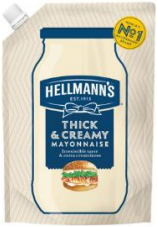

In [16]:
marker

In [ ]:
trace = go.Scatter(
    x=[1, 2, 3, 4, 5],
    y=[1, 4, 9, 16, 25],
    mode='markers',
    marker=marker
)

In [18]:
from plotly.validators.scatter.marker import SymbolValidator

raw_symbols = SymbolValidator().values

raw_symbols[2]

'circle'

In [20]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


ModuleNotFoundError: No module named 'matplotlib'

In [21]:
import matplotlib

ModuleNotFoundError: No module named 'matplotlib'

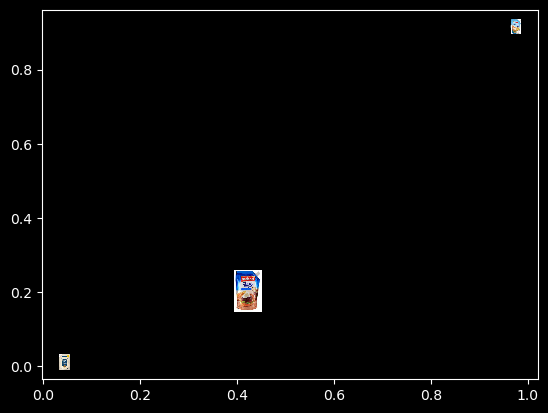

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 生成一些随机数据
x = np.random.rand(3)
y = np.random.rand(3)

# 加载一个图片作为标记
imgs = []
imgs.append(plt.imread('/home/yhao/code/learning/python/package/plot/markers/D1V1.png'))
imgs.append(plt.imread('/home/yhao/code/learning/python/package/plot/markers/C1V1.png'))
imgs.append(plt.imread('/home/yhao/code/learning/python/package/plot/markers/C2V1.png'))


# 创建一个3D图形
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)

# 循环绘制散点图,每个点使用图像作为标记
for i in range(len(x)):
    im = OffsetImage(imgs[i], zoom=0.05)
    ab = AnnotationBbox(im, (x[i], y[i]), xycoords='data', frameon=False)
    ax.add_artist(ab)

# # 设置缩放功能
# # scale = plt.axes([0.1, 0.05, 0.8, 0.9])  # 控制缩放滑块的位置和大小
# plt.subplots_adjust(left=0.25)  # 调整子图的位置,防止与滑块重叠
# mng = plt.get_current_fig_manager()
# mng.set_window_title('Axes Zoomer')

# 显示图形
# plt.show()

# 设置事件

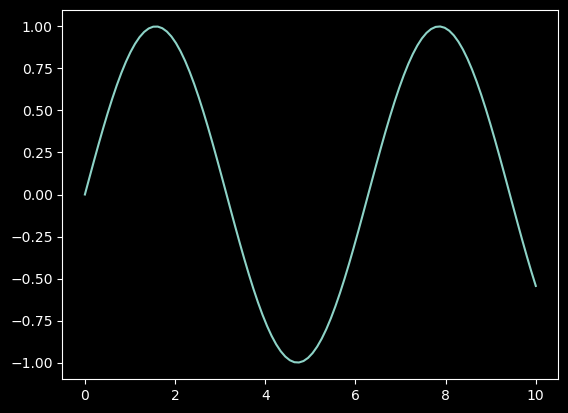

In [8]:
import cv2

# 滚轮放缩
def on_scroll(event):
    """定义鼠标滚轮事件处理函数"""
    base_scale = 1.1
    xdata = event.xdata  # 鼠标在x轴上的坐标
    ydata = event.ydata  # 鼠标在y轴上的坐标
    if event.button == 'up':
        # 向上滚动鼠标滚轮
        scale_factor = 1/base_scale
    elif event.button == 'down':
        # 向下滚动鼠标滚轮
        scale_factor = base_scale
    else:
        # 不处理其他滚轮事件
        return
    # 获取当前坐标系的缩放比例
    current_xlim = ax.get_xlim()
    current_ylim = ax.get_ylim()
    x_range = current_xlim[1] - current_xlim[0]
    y_range = current_ylim[1] - current_ylim[0]
    # 计算新的缩放比例
    new_x_range = x_range*scale_factor
    new_y_range = y_range*scale_factor
    # 计算缩放后的坐标范围
    new_xlim = xdata - (xdata - current_xlim[0])*new_x_range/x_range, \
              xdata + (current_xlim[1] - xdata)*new_x_range/x_range
    new_ylim = ydata - (ydata - current_ylim[0])*new_y_range/y_range, \
              ydata + (current_ylim[1] - ydata)*new_y_range/y_range
    # 更新坐标轴范围
    ax.set_xlim(new_xlim)
    ax.set_ylim(new_ylim)
    # 重新绘制图形
    fig.canvas.draw_idle()


# 生成随机数据
x = np.linspace(0, 10, 100)
y = np.sin(x)
 
# 创建图形和子图
fig, ax = plt.subplots()
 
# 绘制曲线
line1=ax.plot(x, y)

# 连接鼠标滚轮事件处理函数
fig.canvas.mpl_connect('scroll_event', on_scroll)

plt.show()